# Logistic Regression

Logistic regression is a classification algorithm, used to estimate probabilities (Binary values like 0/1, yes/no, true/false) based on given set of independent variable(s). Its output values lies between 0 and 1. Prior to building a model, the features values are transformed using the logistic function (Sigmoid) to produce probability values that can be mapped to two or more classes.

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

DATA_DIR='data/'

### Load Data

In [264]:
def load_data():
    return np.loadtxt(DATA_DIR+'logistic.csv',skiprows=1, delimiter=",")

def extract():
    data = load_data()

    # Sort Data (Not necessary)
    data = data[np.argsort(data[:,2])]
    #print data[43:47]

    #Extract Trues/Falses (1s and 0s)
    trues = data[data[:,2] == 1] # select rows where 3rd column is 1
    falses = data[data[:,2] == 0]

    #Extract Features + Labels
    features = data[:,[0,1]]
    labels = data[:,2]
    labels.shape = (len(features),1) #reshape to keep consistent w features

    return data, features, labels, trues, falses

data, features, labels, trues, falses = extract()

#Show Sample Data
print "Dataset"
print data[:5]
print data.shape
print "Trues"
print trues[:5]
print trues.shape
print "Falses"
print falses[:5]
print falses.shape
print "Features"
print features[:5]
print features.shape
print "Labels"
print labels[:5]
print labels.shape

Dataset
[[ 2.03070798  3.93726653  0.        ]
 [ 3.44310934  7.06634686  0.        ]
 [ 4.90308762  6.02547778  0.        ]
 [ 0.92562818  3.42126711  0.        ]
 [ 1.09147202  7.08437697  0.        ]]
(100, 3)
Trues
[[ 6.46089606  7.07629269  1.        ]
 [ 7.63063693  7.4053514   1.        ]
 [ 4.77857249  8.28287133  1.        ]
 [ 9.08162719  1.4373504   1.        ]
 [ 9.68310414  9.50704973  1.        ]]
(55, 3)
Falses
[[ 2.03070798  3.93726653  0.        ]
 [ 3.44310934  7.06634686  0.        ]
 [ 4.90308762  6.02547778  0.        ]
 [ 0.92562818  3.42126711  0.        ]
 [ 1.09147202  7.08437697  0.        ]]
(45, 3)
Features
[[ 2.03070798  3.93726653]
 [ 3.44310934  7.06634686]
 [ 4.90308762  6.02547778]
 [ 0.92562818  3.42126711]
 [ 1.09147202  7.08437697]]
(100, 2)
Labels
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
(100, 1)


### Visualize

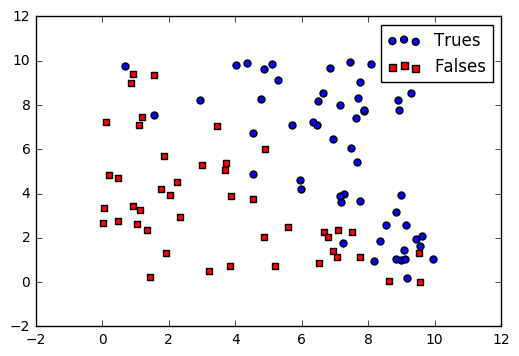

In [4]:
def plot_scatter(trues,falses):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(trues[:,0],trues[:,1], s=25, c='b', marker="o", label='Trues')
    ax1.scatter(falses[:,0],falses[:,1], s=25, c='r', marker="s", label='Falses')
    plt.legend(loc='upper right');

    #plot_decision_boundary()
    plt.show()
    

# WIP
def plot_decision_boundary(x_vec, mu_vec1, mu_vec2):
    g1 = (x_vec-mu_vec1).T.dot((x_vec-mu_vec1))
    g2 = 2*( (x_vec-mu_vec2).T.dot((x_vec-mu_vec2)) )
    return g1 - g2

plot_scatter(trues,falses)


### Sigmoid

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use Sigmoid to map predictions to probabilities.<br><br>
 prob(label=0) = 1 / (1 + e^-val)
* e = base of natural logs (https://en.wikipedia.org/wiki/E_(mathematical_constant))
* val = input value (or your models equation that produces a prediction value)

In [5]:
def sigmoid(array):
    #prob(label=0) = 1 / (1 + e^-array)
    return  1 / (1 + np.exp(-array))

example = np.array([-2,-5,1,2,3,10])
transformed = sigmoid(example)
print transformed

[ 0.11920292  0.00669285  0.73105858  0.88079708  0.95257413  0.9999546 ]


#### Visualize

The sigmoid function crosses 0.5 at its origin and flattens out as probabilities approach 0 and 1.

Input Array ------
[-5.  -4.7 -4.4 -4.1 -3.8 -3.5 -3.2 -2.9 -2.6 -2.3 -2.  -1.7 -1.4 -1.1 -0.8
 -0.5 -0.2  0.1  0.4  0.7  1.   1.3  1.6  1.9  2.2  2.5  2.8  3.1  3.4  3.7
  4.   4.3  4.6  4.9]


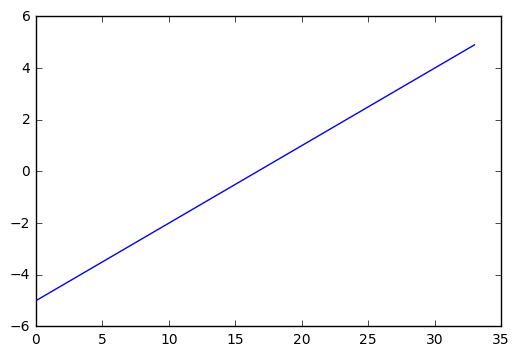

Sigmoid Tranformed -------
[ 0.00669285  0.0090133   0.01212843  0.0163025   0.02188127  0.02931223
  0.03916572  0.05215356  0.06913842  0.09112296  0.11920292  0.15446527
  0.19781611  0.24973989  0.31002552  0.37754067  0.450166    0.52497919
  0.59868766  0.66818777  0.73105858  0.78583498  0.83201839  0.86989153
  0.90024951  0.92414182  0.94267582  0.95689275  0.96770454  0.97587298
  0.98201379  0.98661308  0.9900482   0.99260846]


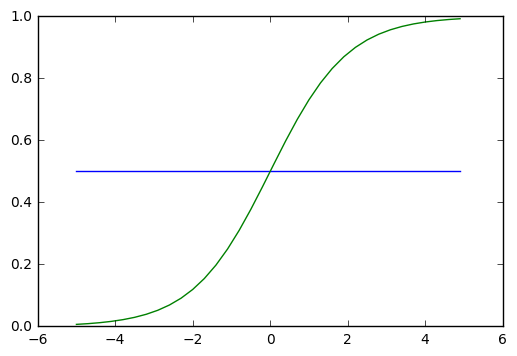

In [6]:
values = np.arange(-5, 5, .3)
print "Input Array ------"
print np.round(values,1)
plt.plot(values)
plt.show()

sig = sigmoid(values)
print "Sigmoid Tranformed -------"
print sig
plt.plot(values, [.5 for i in range(len(values))])
plt.plot(values, sig)
plt.show()

### Add Bias

Adding bias is an important step to build a good model. A detailed explanation can be found [here] in our wiki.  

In [299]:
# Add Bias Column for W0
def add_bias(features):
    bias = np.ones(shape=(len(features),1))
    features = np.append(bias, features, axis=1)
    return features

features = add_bias(features)
print features[:5]
print features.shape

[[ 1.          2.03070798  3.93726653]
 [ 1.          3.44310934  7.06634686]
 [ 1.          4.90308762  6.02547778]
 [ 1.          0.92562818  3.42126711]
 [ 1.          1.09147202  7.08437697]]
(100, 3)


### Prepare Weights

In [8]:
W0 = 0.0
W1 = 0.0
W2 = 0.0
weights = np.array([
        [W0],
        [W1],
        [W2]
    ])
print weights.shape

(3, 1)


### Predict Function

* prediction = W0 + W1x1 + W2x2

Link to Linear Regression Wiki

We transform the output using the Sigmoid function to return a probability value between 0 and 1.

* P(label=1) = 1 / (1 + e^(-prediction))

In [9]:
def predict(features, weights):
    # Returns 1D array of probabilities
    # That the true label == 1
    return 1 / (1 + np.exp(-np.dot(features,weights)))
predict(features,weights)[:5]

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]])

Our prediction function returns the probability of our observation being postitive, True, or "Yes". We call this class 1 and its notation is P(class=1). As the probability gets closer to 1, our model is more confident that the observation is in class 1 (True).

For example, imagine we are trying to predict whether a student will pass or fail a test based on features like hours slept, past test scores, and time spent studying. We pass those features and weights into our predict function and our model outputs a probablity score between 0 (Fail) and 1 (Pass). If the model returns .4 it believes there is only a 40% change of passing. If our decision boundary was .5, we would categorize this observation as "Fail."

### Decision Boundary

A decision bounary is a pretty simple concept. Logistic regression is a classification algorithm, the output should be a category: Yes/No, True/False, Red/Yellow/Orange. Our prediction function however returns a probabability score between 0 and 1. A decision boundary is a threshold or tipping point that helps us decide which category to choose based on probability. 

    hθ(x)≥0.5→y=1
    hθ(x)<0.5→y=0

For example, if our threshold was .5 and our predict function returned .7, we would classify this observation as positive. Similarly if our prediction was .2 we would classify the observation as negative.

For logistic regression with multiple classes we could select the class with the highest predicted probability.

[Insert Picture of Decision Boundary]

### Cost Function

Remember for linear regression we used MSE? 
1/2N * SUM[ (y - (mx + b))^2 ]

Unfortunately we can't use MSE for Logistic Regression. Why? There is a great math explanation https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent and http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/.

But for now I'll simply say that the ouput of our prediction function is non-linear (due to sigmoid transform). Plugging our predictions into MSE will result in a non-convex output with many local minimums. If our cost function has many local minimums, gradient descent may get stuck and not find the optimal global minimum.

#### Mean Absolute Error

Our new cost function will look like this:
    
    [IMAGE OF Cost y=1 and y=0]
    
Graphically it looks like this
    [Graphs of change in cost for y=1 and y=0]
    
The key thing to note is MLE penalizes confident and wrong predictions a lot! On the other end, increaseing the accuracy of your prediction (closer to 0 or 1) has diminishing returns on reducing cost due to the nature of our logistic sigmoid prediction output.

Compress our two costs functinos (y=1 and y=0) into one equation.

    [compressed version]
    
<br>Vectorized Version</br>
    [Vectorized formula]
    
https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

Example real world solutions to MLE:
https://en.wikipedia.org/wiki/Quasi-Newton_method

http://www.holehouse.org/mlclass/06_Logistic_Regression.html

#### Why Does our cost function use Negatives?

This confused me initially but it's actually simple: our prediction function (transformed by sigmoid) returns values between 0 and 1. In order to ensure a convex cost output (so we can find local minimums with gradient descent), our cost function takes the log of our predictions. However taking the log of numbers between 0 and 1 results in negative values which are confusing to work with. So we simply convert them to positive values using the negative sign!

Just as a reminder, we can't take the natural log of negative numbers, but the resulting output CAN be negative if input values are between 0 and 1.

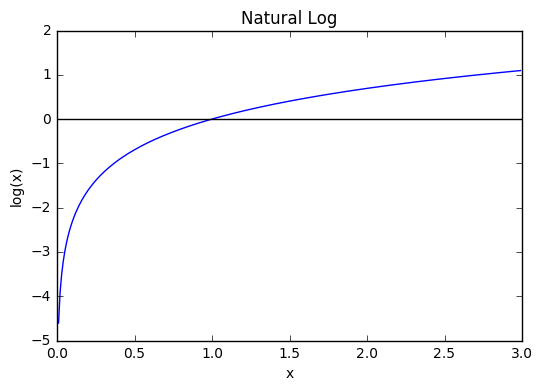

In [38]:
### Natural Log

values = np.arange(0, 3, .01)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(values, [np.log(i) for i in values])
ax.set_title('Natural Log')
ax.set_xlabel('x')
ax.set_ylabel('log(x)')
plt.axhline(0, color='black')
plt.show()

In [71]:
# Using Mean Absolute Error
def cost_function(features, labels, weights):
    '''
    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)
    
    predictions = predict(features, weights)
    
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)
    
    #Take the sum of both costs
    cost = class1_cost - class2_cost
    
    #Take the average cost
    cost = sum(cost)/observations
    
    return cost
    
cost_function(features,labels,weights)[:5]

array([ 0.68236603])

### Gradient Descent

To minimize our cost, we use gradient descent just like before in Linear Regression (link to wiki). Even better for us, the formula is exactly the same! 

Steps:
1. Calculate gradient average
2. Multiply by learning rate
3. Subtract from weights

Formula Pseudocode:

    ["Repeat" pseudocode from Andrew Ng]
    
http://www.holehouse.org/mlclass/06_Logistic_Regression.html

Vectorized Gradient Descent

    [Insert both formulas]
    
<b>Alternatives to Gradient Descent?</b><br>
More sophisticated, faster ways to optimize θ that can be used instead of gradient descent.
* Conjugate gradient
* BFGS
* L-BFGS

Libraries use these! Don’t worry about it.

In [118]:
# Vectorized Gradient Descent
# gradient = X.T * (X*W - y) / N
# gradient = features.T * (predictions - labels) / N

def update_weights(features, labels, weights, lr):
    '''
    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''    
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)
    
    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives -- 
    # one for each feature -- representing the aggregate 
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr
    
    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

update_weights(features, labels, weights, .05)

array([[-0.00250116],
       [ 0.07881087],
       [ 0.04696091]])

### Train

In [119]:
def train(features, labels, weights, lr, iters):
    cost_history = []
    
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        
        # Log Progress
        if i % 1000 == 0:
            print "iter: "+str(i) + " cost: "+str(cost)


    print "Final cost: "+str(cost) + " weights:"+str(weights)
    return weights, cost_history

### Visualize

In [120]:
def graph_cost(cost_history):
    iterations = [i for i in range(1,len(cost_history)+1)]
    plt.plot(iterations, cost_history)
    plt.title('Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

### Run

In [196]:
def run():
    # Set Hyperparameters
    lr = .05
    iters = 10000
    
    data = load_data()

    features = data[:,[0,1]]
    labels = data[:,2]
    labels.shape = (100,1)

    # Add Bias Column for W0
    bias = np.ones(shape=(len(features),1))
    features = np.append(bias, features, axis=1)

    # Initialize Weights
    W0 = 0.0
    W1 = 0.0
    W2 = 0.0
    weights = np.array([
            [W0],
            [W1],
            [W2],
        ])
    
    # Train
    print "\nTRAINING ----------"
    weights, cost_hist = train(features, labels, weights, lr, iters)
    print "\nTRAINING COMPLETE ----------"
    print "Weights"
    print weights

    graph_error(cost_hist)

    return data, features, labels, weights


TRAINING ----------
iter: 0 cost: [ 0.62909616]
iter: 1000 cost: [ 0.35651754]
iter: 2000 cost: [ 0.30245498]
iter: 3000 cost: [ 0.2783982]
iter: 4000 cost: [ 0.26444213]
iter: 5000 cost: [ 0.25522521]
iter: 6000 cost: [ 0.24865285]
iter: 7000 cost: [ 0.24372276]
iter: 8000 cost: [ 0.23988932]
iter: 9000 cost: [ 0.23682766]
Final cost: [ 0.23433342] weights:[[-9.85915014]
 [ 1.09178276]
 [ 0.89351049]]

TRAINING COMPLETE ----------
Weights
[[-9.85915014]
 [ 1.09178276]
 [ 0.89351049]]


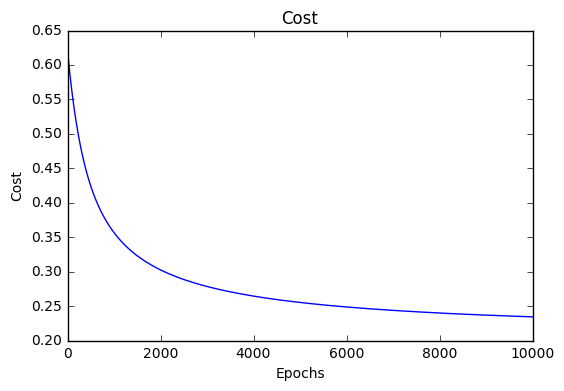

In [206]:
observations, features, labels, weights = run()

### Classify

The final step is to convert assign predicted probabilities into class labels (0 or 1)

In [243]:
# Helpers for classifying single observation
def predict_observation(observation, weights):
    '''
    observation = (1,2)
    weights = (1,3)
    output = probability between 0 and 1
    '''
    return weights[0] + observation[1]*weights[1] + observation[2]*weights[2]

#1 + 2*2 + 3*3 == 14
assert predict_observation(np.array([1,2,3]),np.array([1,2,3])) == 14
print predict_observation(np.array([1,2,3]),np.array([1,2,3]))

#weights
#-9.85915014  1.09178276  0.89351049

def classify_observation(probability):
    return 1 if probability >= .5 else 0

assert classify_observation(.25) == 0
assert classify_observation(.5) == 1
assert classify_observation(.99) == 1
    
# Classify all predictions
def classifier(predictions):
    '''
    predictions = N element array of numbers between 0 and 1
    output = N element array of 0s (False) and 1s (True)
    '''
    vectorized_func = np.vectorize(classify_observation)
    return vectorized_func(predictions).flatten()


probabilities = predict(features, weights).flatten()
classifications = classifier(predictions)
print "Predictions"
print predictions[:10]
print "Classifications"
print classifications[:10]
print "Labels"
print labels[:10].flatten()
assert classifications[1] == labels.flatten()[1]

14
Predictions
[ 0.98295878  0.40386361  0.00647436  0.80726131  0.98942331  0.00139871
  0.69651518  0.99342948  0.96633361  0.06172406]
Classifications
[1 0 0 1 1 0 1 1 1 0]
Labels
[ 1.  0.  0.  1.  1.  0.  1.  1.  1.  0.]


### Model Evaluation

- Visualize final line (binary) / lines (multi)
- Confusion Matrix
- TP/TN/FP/FN
- Error/Likelihood Trend over time
-Cross-validation?

#### Accuracy

In [208]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

acc_predicted = np.array([1,0,0,1])
acc_actual = np.array([1,0,0,0])
assert accuracy(acc_predicted, acc_actual) == .75

print accuracy(classifications,labels.flatten())

0.89


#### Decision Boundary

Example Trues
(55, 1)
[[ 0.971]
 [ 0.994]
 [ 0.94 ]
 [ 0.793]
 [ 1.   ]]
Example Falses
(45, 1)
[[ 0.016]
 [ 0.553]
 [ 0.706]
 [ 0.003]
 [ 0.088]]


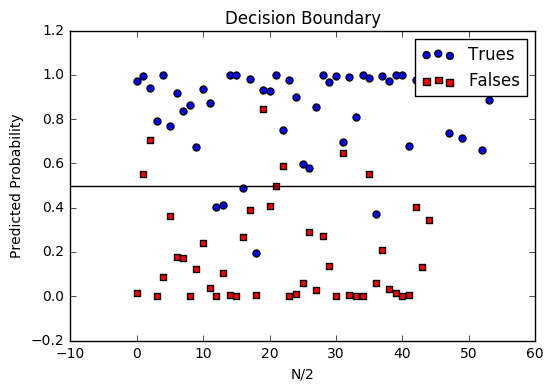

In [298]:
trues_predictions = predict(add_bias(trues[:,[0,1]]),weights)
falses_predictions = predict(add_bias(falses[:,[0,1]]),weights)
print "Example Trues"
print trues_predictions.shape
print np.round(trues_predictions[:5],3)
print "Example Falses"
print falses_predictions.shape
print np.round(falses_predictions[:5],3)


def plot_decision_boundary(trues_preds, falses_preds, db):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    no_of_preds = len(trues_preds) + len(falses_preds)
    
    ax.scatter([i for i in range(len(trues_preds))],trues_preds, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses_preds))],falses_preds, s=25, c='r', marker="s", label='Falses')
    
    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()
    
plot_decision_boundary(trues_predictions, falses_predictions, .5)

### Multiclass Logistic Regression (One-vs-all)

Instead of y = {0,1} we will expand our definition so that y = {0,1...n}. Basically we re-run binary classification multiple times, once for each class.

Steps
1. Divide the problem into n+1 binary classification problems (+1 because the index starts at 0?). 
2. For each class...
3. Predict the probability the observations are in that single class.
4. prediction = max(probability of the classes)

For each sub-problem, we select one class (YES) and lump all the others into a second class (NO). Then we take the class with the highest predicted value.

Visualize Output Graph
What does it looks like with multiple classes and lines?

Adding Bias
Adding a bias (constant) feature is crucial to building a good model. Normally that feature is just a set of ones for all your training examples. (if X is your feature matrix then X0X0 is a vector with ones). Why? I’ve already explained this.


### Code Examples

#### Scikit-learn

* http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://github.com/perborgen/LogisticRegression/blob/master/logistic.py

#### Keras

* https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970#.genfwiw5g
* http://www.thoughtly.co/blog/deep-learning-lesson-3/

#### Theano

* http://deeplearning.net/tutorial/logreg.html#logreg

### Resources

* https://www.coursera.org/learn/machine-learning/resources/Zi29t
* http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/
* https://scilab.io/machine-learning-logistic-regression-tutorial/
* http://www.ritchieng.com/logistic-regression/
* [Dataset](http://scilab.io/wp-content/uploads/2016/07/data_classification.csv)